In [20]:
import mne, sys
from src.eeg_analysis.visualization.my_custom_style import set_custom_style

print(mne.__version__, sys.executable)


1.9.0 c:\Users\Kourosh\.conda\envs\capachinos_env\python.exe


Creating RawArray with float64 data, n_channels=16, n_times=15360
    Range : 0 ... 15359 =      0.000 ...    59.996 secs
Ready.
<RawArray | 16 x 15360 (60.0 s), ~1.9 MiB, data loaded>


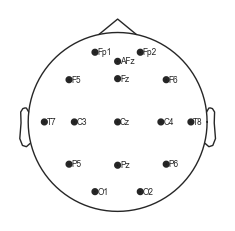

In [27]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import os

# ------------------------------------------------------------------
# 1) your channel layout
# ------------------------------------------------------------------
channels_by_region = {
    "prefrontal": ["Fp1", "Fp2", "AFz"],
    "frontal":    ["F5", "F6", "Fz"],
    "central":    ["C3", "C4", "Cz"],
    "temporal":   ["T7", "T8"],
    "parietal":   ["P5", "P6", "Pz"],
    "occipital":  ["O1", "O2"],
}
ch_names = sum(channels_by_region.values(), [])      # flatten to one list
ch_types = ["eeg"] * len(ch_names)

# ------------------------------------------------------------------
# 2) fabricate white-noise data (1 minute @ 256 Hz, ~µV amplitude)
# ------------------------------------------------------------------
sfreq    = 256          # Hz
duration = 60           # seconds
n_samples = sfreq * duration

rng   = np.random.default_rng(42)          # reproducible
data  = rng.standard_normal((len(ch_names), n_samples)) * 1e-6  # volts

# ------------------------------------------------------------------
# 3) build RawArray and add sensor positions
# ------------------------------------------------------------------
info = mne.create_info(ch_names, sfreq, ch_types)
raw  = mne.io.RawArray(data, info)

# use 10-20 / 10-10 coordinates; switch to 'standard_1010' if you need F5 /F6 /P5 /P6
montage = mne.channels.make_standard_montage("easycap-M1")   # or "standard_1020"
raw.set_montage(montage, on_missing="warn")   # warns if a name lacks coordinates

print(raw)                                    # check everything looks right

# ------------------------------------------------------------------
# 4) visualise 
# ------------------------------------------------------------------

set_custom_style()

plot_width, plot_height = 200, 200
fig, ax = plt.subplots(1, 1, figsize=(plot_width/72, plot_height/72))

mne.viz.plot_sensors(
    raw.info,
    kind="topomap",
    show_names={"fontsize": 20}, 
    pointsize = 10,
    axes=ax,
    show=False   
    # sphere=0.11
)

main_dir = 'D:/Anesthesia_Research_Fellow/analysis_results'
filename = 'topomap.pdf'
file_path = os.path.join(main_dir, filename)

plt.savefig(file_path, format='pdf', dpi=300)

plt.show() 